<a href="https://colab.research.google.com/github/nabilazulfika/Heart-Failure-Project-With-Min-Max-Scaler/blob/main/Skenario_2_Fitur_MinMaxScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tentang Dataset**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global , mengambil sekitar 17,9 juta jiwa setiap tahun , yang menyumbang 31% dari semua kematian di seluruh dunia .
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

**Informasi atribut:**
- Usia
- Penurunan sel darah merah atau hemoglobin (boolean)
- Tingkat enzim CPK dalam darah (mcg/L)
- Jika pasien menderita diabetes (boolean)
- Persentase darah yang meninggalkan jantung pada setiap kontraksi (persentase)
- Jika pasien memiliki hipertensi (boolean)
- Trombosit dalam darah (kiloplatelet/mL)
- Kadar kreatinin serum dalam darah (mg/dL)
- Kadar natrium serum dalam darah (mEq/L)
- Wanita atau pria (biner)

***Note**

Ada 2 kolom yang tidak bisa dijadikan fitur:
- **DEATH_EVENT**, mengkodekan apakah pasien meninggal (1) atau apakah mereka disensor (0). Menyensor berarti bahwa para ilmuwan kehilangan kontak dengan pasien.

- **time**, menangkap waktu kejadian. Artinya, waktu di mana pasien meninggal atau disensor.

time sangat berkorelasi dengan DEATH_EVENT karena kematian pasien berdampak langsung pada waktu, bukan sebaliknya . Jika tujuannya adalah untuk memprediksi kematian atau kelangsungan hidup pasien, maka time tidak boleh digunakan sebagai input model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing Data

In [ ]:
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# labelEncoder
from sklearn.preprocessing import LabelEncoder

# scaling data
from sklearn.preprocessing import MinMaxScaler

# ADASYN
from imblearn.over_sampling import ADASYN

# splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# modelling
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv")

# Checking Data

Kolom **DEATH_EVENT** adalah kolom yang akan kita jadikan target prediksi. Mari kita lakukan **rename** menjadi **target**.

In [ ]:
print(df.shape)

(299, 13)


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df = df.rename(columns={"DEATH_EVENT": "target"})

**Cek apakah ada nilai null atau tidak.**

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
target                      0
dtype: int64

**Cek apakah ada nilai duplikat atau tidak.**

In [ ]:
df.duplicated().sum()

0

**Cek statistik deskriptif dataframe.**

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Preprocessing Data

In [ ]:
le = LabelEncoder()

df['anaemia'] = le.fit_transform(df['anaemia'])
df['diabetes'] = le.fit_transform(df['diabetes'])
df['high_blood_pressure'] = le.fit_transform(df['high_blood_pressure'])
df['sex'] = le.fit_transform(df['sex'])
df['smoking'] = le.fit_transform(df['smoking'])
df['target'] = le.fit_transform(df['target'])

df.to_csv("df_encode.csv")

## Feature Importance

[0.08523005 0.01482611 0.07917484 0.01407369 0.11808872 0.01525035
 0.07012135 0.14198689 0.07647729 0.01175417 0.01502438 0.35799217]


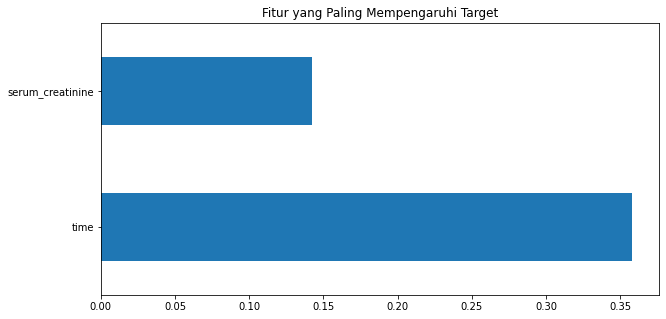

In [ ]:
X = df.drop(['target'], axis=1)
y = df['target']

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 

#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
feat_importances.nlargest(2).plot(kind='barh')
plt.title("Fitur yang Paling Mempengaruhi Target")

plt.show()

## Feature Scalling

In [ ]:
final_df = df[['serum_creatinine', 'time']]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit(final_df)
X = scaler.transform(final_df)
y = df['target']

In [ ]:
X1 = pd.DataFrame(data=X, columns=["serum_creatinine", "time"])

Text(0.5, 1.0, 'After Scalling')

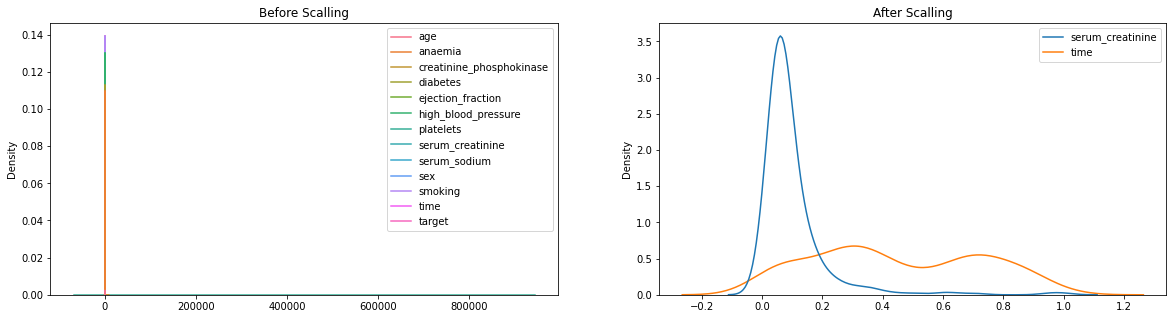

In [ ]:
fig, (ax1, ax2)= plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.kdeplot(data=df, ax=ax1)
ax1.set_title('Before Scalling')

sns.kdeplot(data=X1, ax=ax2)
ax2.set_title('After Scalling')

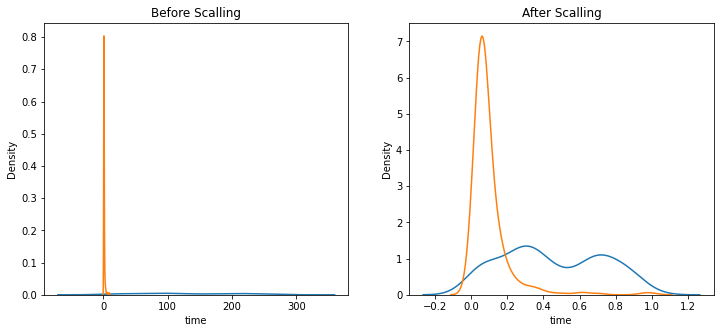

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#Before scalling
ax1.set_title('Before Scalling')
sns.kdeplot(data=df, x = 'time',ax=ax1)
sns.kdeplot(data=df, x = 'serum_creatinine', ax=ax1)

#After scalling
ax2.set_title('After Scalling')
sns.kdeplot(data=X1, x = 'time',ax=ax2)
sns.kdeplot(data=X1, x = 'serum_creatinine', ax=ax2)
plt.show()

## Cek keseimbangan data target.

In [ ]:
df['target'].value_counts()

0    203
1     96
Name: target, dtype: int64

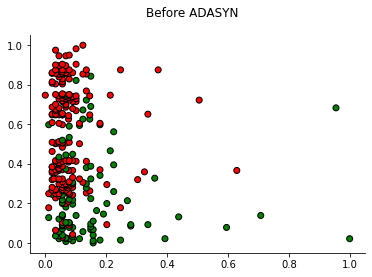

In [ ]:
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("Before ADASYN")
pass

Dari informasi diatas, diketahui bahwa kumpulan **data tidak seimbang**. Kita perlu menyeimbangkannya dulu sebelum melakukan modelling terhadap data.

Tujuan kita adalah untuk memprediksi kematian pasien, maka time tidak boleh 

---

digunakan sebagai input model/fitur.

## Mengatasi ketimpangan kelas dengan teknik oversampling kelas minoritas 

Metode ini mirip dengan SMOTE tetapi menghasilkan jumlah sampel yang berbeda tergantung pada perkiraan distribusi lokal kelas yang akan di-oversampling.

In [ ]:
resample = ADASYN(sampling_strategy='all', random_state=42)
X, y = resample.fit_resample(X,y)

y.value_counts()

1    210
0    203
Name: target, dtype: int64

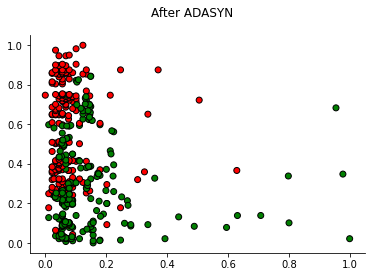

In [ ]:
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
colors = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle("After ADASYN")
pass

## KFold Cross Validation

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1

for train_index, test_index in kf.split(X, y):
  print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
  cnt += 1

Fold:1, Train set: 371, Test set:42
Fold:2, Train set: 371, Test set:42
Fold:3, Train set: 371, Test set:42
Fold:4, Train set: 372, Test set:41
Fold:5, Train set: 372, Test set:41
Fold:6, Train set: 372, Test set:41
Fold:7, Train set: 372, Test set:41
Fold:8, Train set: 372, Test set:41
Fold:9, Train set: 372, Test set:41
Fold:10, Train set: 372, Test set:41


# Accuracy

In [ ]:
classifier_rf = RandomForestClassifier()

accuracy   = []

for train_index, test_index in kf.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 
  classifier_rf.fit(X_train,y_train)
  y_pred = classifier_rf.predict(X_test)

  ac = accuracy_score(y_test,y_pred)

  accuracy.append(ac)

print(accuracy)
print(ac)

[0.7619047619047619, 0.8571428571428571, 0.8333333333333334, 0.8048780487804879, 0.926829268292683, 0.7804878048780488, 0.8780487804878049, 0.8292682926829268, 0.8536585365853658, 0.8536585365853658]
0.8536585365853658


In [ ]:
print("Random Forest:", accuracy_score(y_test, y_pred)*100)

Random Forest: 85.36585365853658


# Confusion Matrix & Classification Report

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


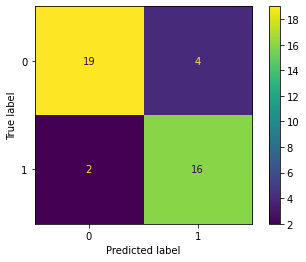

In [ ]:
plot_confusion_matrix(classifier_rf, X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


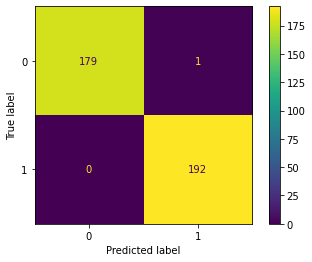

In [ ]:
plot_confusion_matrix(classifier_rf, X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


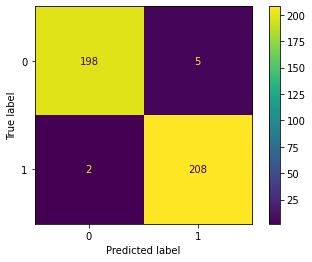

In [ ]:
plot_confusion_matrix(classifier_rf, X, y)

In [ ]:
# Random Forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.80      0.89      0.84        18

    accuracy                           0.85        41
   macro avg       0.85      0.86      0.85        41
weighted avg       0.86      0.85      0.85        41

